In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
pd.set_option('max_rows',1000)
import os
from glob import iglob
from qvalue import estimate
THRESH = 0.1

In [3]:
# Load all structural p-values across both analyses
df = pd.read_csv("/Volumes/sivleyrm/pdbmap/results/specialK_analysis_2016-06-30/tonycons/tonycons_K_summary.txt",delimiter='\t')
df = df.drop_duplicates(["structid","chain"])

In [4]:
print "Number of structures evaluated:"
print len(df)
print "Number of variants evluated:"
print "%.0f"%np.sum(df["N"])

df.ix[~df[ "Kp"].isnull(),"Kq"],K_lam,K_pi = estimate(df.ix[~df[ "Kp"].isnull(),"Kp"].values)
print "\nProteins passing an FDR of %.0f%% for the unweighted analysis"%(THRESH*100)
print "Total:   %4d"%( df['Kq']<THRESH).sum()
print "    Clustered: %4d"%((df['Kq']<THRESH) & (df["Kz"]>0)).sum()
print "    Dispersed: %4d"%((df['Kq']<THRESH) & (df["Kz"]<0)).sum()

df.ix[~df["wKp"].isnull(),"wKq"],wK_lam,wK_pi = estimate(df.ix[~df["wKp"].isnull(),"wKp"].values)                                          
print "\nProteins passing an FDR of %.0f%% for the weighted analysis"%(THRESH*100)
print "Total:   %4d"%( df['wKq']<THRESH).sum()
print "    Clustered: %4d"%((df['wKq']<THRESH) & (df["wKz"]>0)).sum()
print "    Dispersed: %4d"%((df['wKq']<THRESH) & (df["wKz"]<0)).sum()

Number of structures evaluated:
3197
Number of variants evluated:
658289

Proteins passing an FDR of 10% for the unweighted analysis
Total:      0
    Clustered:    0
    Dispersed:    0

Proteins passing an FDR of 10% for the weighted analysis
Total:   3194
    Clustered: 2952
    Dispersed:  242


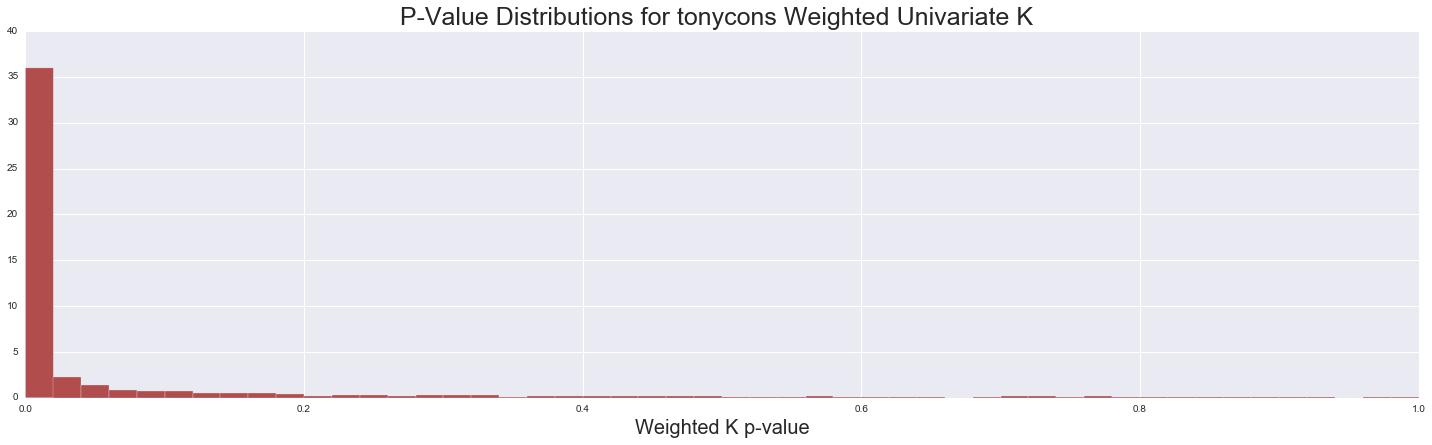

In [27]:
# P-Value Distributions
pal = list(sns.color_palette("Set1", n_colors=1, desat=.5))
fig,ax = plt.subplots(1,1,figsize=(20,6))
plt.suptitle("P-Value Distributions for tonycons Weighted Univariate K",fontsize=25,y=1.02)
ax.set_xlabel("Weighted K p-value",fontsize=20)
ax.hist(df["wKp"],bins=np.arange(0,1.02,0.02),color=pal[0],normed=True)
# ax.plot(wK_lam,wK_pi,lw=3,c='black')
plt.tight_layout()
plt.show()

In [28]:
def prep_split(dfx):
    df  = dfx.copy()
    df['fdr']  = 'All              (N=%4d)'%len(df)
    dft = dfx[dfx["wKq"]<0.1].copy()
    dft['fdr'] = 'FDR < 0.1 (N=%4d)'%len(dft)
    df = pd.concat((df,dft)).dropna(subset=["wKz"])
    df['dummy'] = ''
    return df

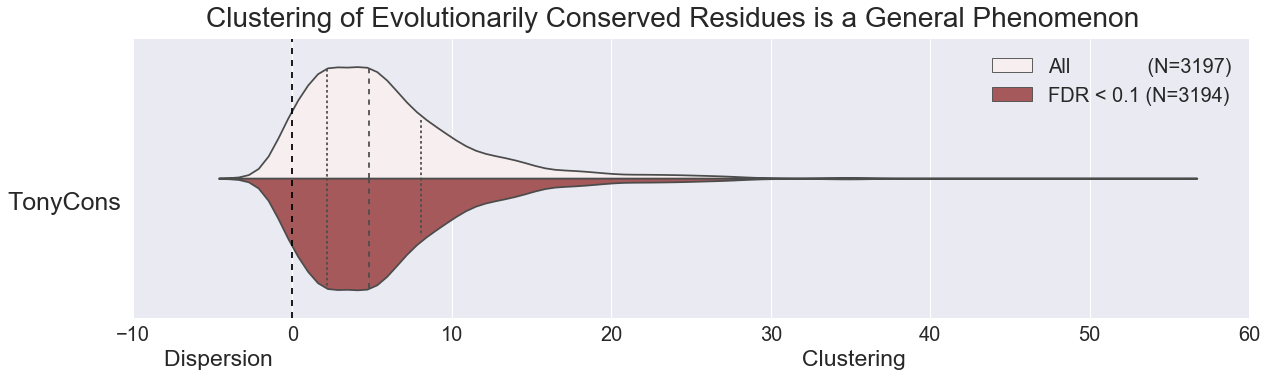

In [45]:
# Setup the plot
fig,ax = plt.subplots(figsize=(20,5),sharex=True,facecolor='white')
plt.subplots_adjust(wspace=0, hspace=0)
pal = list(sns.color_palette("Set1", n_colors=3, desat=.5))

# Plot the FDR-significant K for RSA-weighted residues
tdf = prep_split(df)
sns.violinplot(x='wKz',y='dummy',hue='fdr',data=tdf,inner='quart',color=pal[0],split=True,scale='width',cut=0,ax=ax)
tdf.ix[tdf['fdr']!='FDR < 0.1','Kz'] = np.nan
# sns.stripplot(x='wKz',y='dummy',hue='fdr',data=tdf,jitter=True,linewidth=1,color=pal[0],orient='h',split=True,edgecolor='white',size=10,lw=2,ax=ax)
ax.set_ylabel("TonyCons",fontsize=25,rotation='horizontal',ha='right',y=0.37)
handles, labels = ax.get_legend_handles_labels()
ax.legend(fontsize=20,handles=handles[:2])
ax.axvline(0.,ls='dashed',c='black')
plt.rcParams['xtick.labelsize'] = 20
plt.xlabel("Dispersion%sClustering%s"%(' '*83,' '*49),fontsize=23)
plt.suptitle("Clustering of Evolutionarily Conserved Residues is a General Phenomenon",fontsize=28,y=0.99)
plt.show()

In [32]:
print "Un-Weighted: FDR-Significantly Clustered Proteins"
print df.ix[(df["Kq"]<0.1) & (df["Kz"]>0),["structid","chain","Kz","Kp","Kq"]]

Un-Weighted: FDR-Significantly Clustered Proteins
Empty DataFrame
Columns: [structid, chain, Kz, Kp, Kq]
Index: []


In [33]:
print "Weighted: FDR-Significantly Dispersed Proteins"
print df.ix[(df["wKq"]<0.1) & (df["wKz"]<0),["structid","chain","wKz","wKp","wKq"]]

Weighted: FDR-Significantly Dispersed Proteins
     structid chain       wKz      wKp       wKq
2        1DGN     A -0.330121  0.33142  0.017505
13       3NXP     A -0.313020  0.30832  0.016391
15       1RMJ     A -1.037595  0.30586  0.016283
18       1HZN     A -0.756067  0.46086  0.023741
31       2EQ3     A -0.067878  0.98532  0.047691
33       1B22     A -0.642203  0.45082  0.023271
38       2KOE     A -0.559259  0.63008  0.031688
55       1H8B     A -0.396588  0.49122  0.025154
74       2K3T     A -0.699761  0.45182  0.023307
78       1WZ0     A -0.330306  0.71796  0.035735
84       1WFV     A -0.563864  0.83018  0.040640
106      1X5H     A -0.295987  0.32694  0.017304
120      1L4T     A -0.640892  0.45770  0.023594
133      2LP1     A -0.905400  0.36786  0.019304
136      4N6J     A -0.666877  0.52004  0.026560
139      2JWA     A -3.788308  0.00002  0.000003
140      2J5D     A -0.913629  0.36946  0.019382
142      4IEJ     A -0.373973  0.52704  0.026899
168      2H4M     D -0